In [36]:
import pandas as pd
from sklearn.datasets import load_iris #usually will read the dataset from a csv
# numpy for numerical operations, matplotlib for plotting, and scikit-learn for regression modeling
import numpy as np
# Importing LinearRegression from scikit-learn to create the linear regression model
from sklearn.linear_model import LinearRegression
# train_test_split to split the dataset into training and testing subsets
from sklearn.model_selection import train_test_split
# mean_squared_error to measure the error and r2_score to evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score
#this is for visualizations
import matplotlib.pyplot as plt

In [13]:
#iris = pd.read_csv('Iris.csv')

In [14]:
data = load_iris() #loading in iris dataset from sklearn
df = pd.DataFrame(data.data, columns=data.feature_names) #we're splitting up a pandast data frame into its columns names and the data attribute of iris NumPy array containing the features of the dataset, which you convert into a Pandas DataFrame for easier manipulation and analysis.
df["target"] = data.target #gives us a target column
df.isna().sum() #checks for rows with an NA value, and sums them up- checks for null values in data set
df.dropna(inplace=True) #naive way to remove null values
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
data.target_names #these are the different types of flowers we will be training/testing on

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

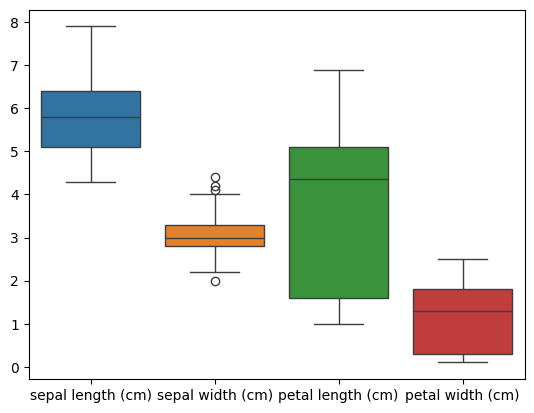

In [17]:
import seaborn as sns #to check for outliers
sns.boxplot(df.iloc[:   , :4]) #left selects rows, right selects columns (so we select first 4 columns and all the rows)

In [18]:
from sklearn.model_selection import train_test_split #methods used to split up data for future testing
X = df.drop(columns=["target"])
X #exact same with no target columns

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
Y = df["target"]
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [39]:
#x_train, x_test, y_train, y_test = train_test_split(X,Y) #splits the data into test and training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #the testing size is 20%

In [40]:
x_train.shape #shape tells you how many rows and how many columns

(120, 4)

In [41]:
x_test.shape

(30, 4)

In [42]:
y_train.shape

(120,)

In [43]:
y_test.shape

(30,)

In [44]:
# Create and train the model
# Importing LinearRegression from scikit-learn to create the linear regression model
model = LinearRegression()
model.fit(x_train, y_train) # the function to fit the model to the training data

LinearRegression()

In [45]:
# Make predictions
y_pred = model.predict(x_test)
y_pred[:5]  # Display first 5 predictions

array([ 2.06844113,  0.96345869, -0.14707913,  1.81304847, -0.03927091])

In [46]:
# Evaluate the model
# mean_squared_error to measure the error and r2_score to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')
print(f'R^2 score: {r2:.2f}')


Mean squared error: 0.05
R^2 score: 0.91


In [50]:
# Plotting the training data and the regression line
# plt.figure(figsize=(10, 6))

# # Plot training data
# plt.scatter(x_train, y_train, color='blue', label='Training data')

# # Plot the regression line
# plt.plot(x_train, y_pred, color='red', linewidth=2, label='Regression line')

# plt.title('Linear Regression Fit')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.show()

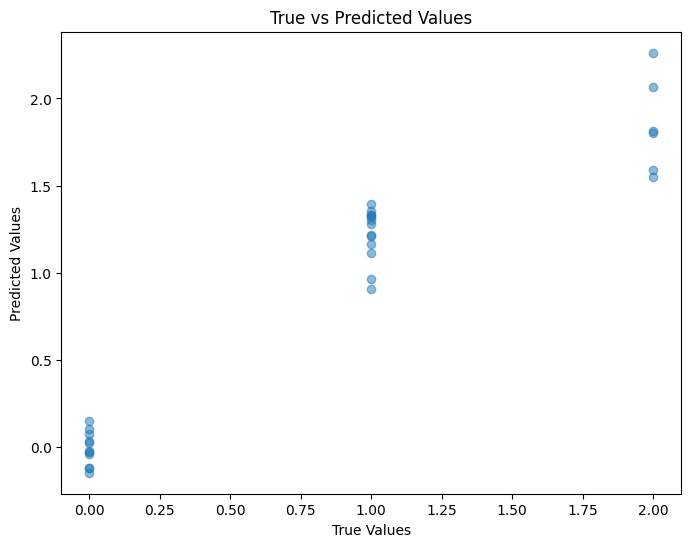

In [48]:
# Scatter plot for regression values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Logistical Regression')
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
# #GIT PUSHING
# !git config --global user.email "akshayassrekha@gmail.com"
# !git config --global user.name "ssrakshaya"

# !git clone https://github.com/ssrakshaya/MLBootcamp.git
# %cd MLBootcamp/

fatal: destination path 'MLBootcamp' already exists and is not an empty directory.
/content/MLBootcamp
